DS Assignment 16

Neural Networks

Gas_turbines

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [3]:
# importing dataset

gt_data=pd.read_csv("/content/gas_turbines.csv")
gt_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## Performing EDA & Visualization on dataset

In [4]:
# Geting Information

gt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
# Descriptive Satistics

gt_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
correlation=gt_data.corr()
correlation

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [7]:
scaler=StandardScaler()
st_gt_data=scaler.fit_transform(gt_data)
df=pd.DataFrame(st_gt_data,columns=gt_data.columns)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


<Axes: >

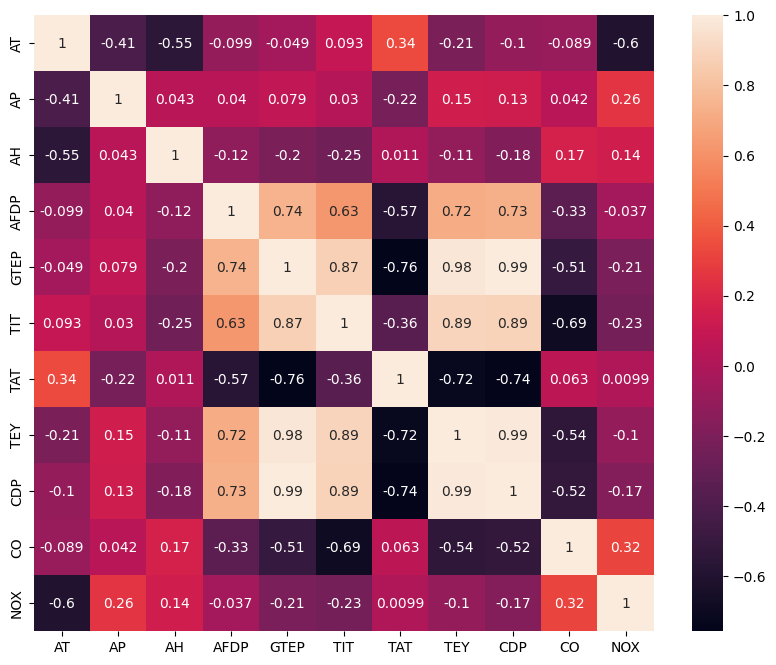

In [8]:
# creating heatmap by use of correlation

plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

<ipython-input-9-902c34043c99>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gt_data[column],color='g',shade=True)
<ipython-input-9-902c34043c99>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gt_data[column],color='g',shade=True)
<ipython-input-9-902c34043c99>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gt_data[column],color='g',shade=True)
<ipython-input-9-902c34043c99>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gt_data[column],color='g',shade=True)
<ipython-input-9-902c34043c99>:8

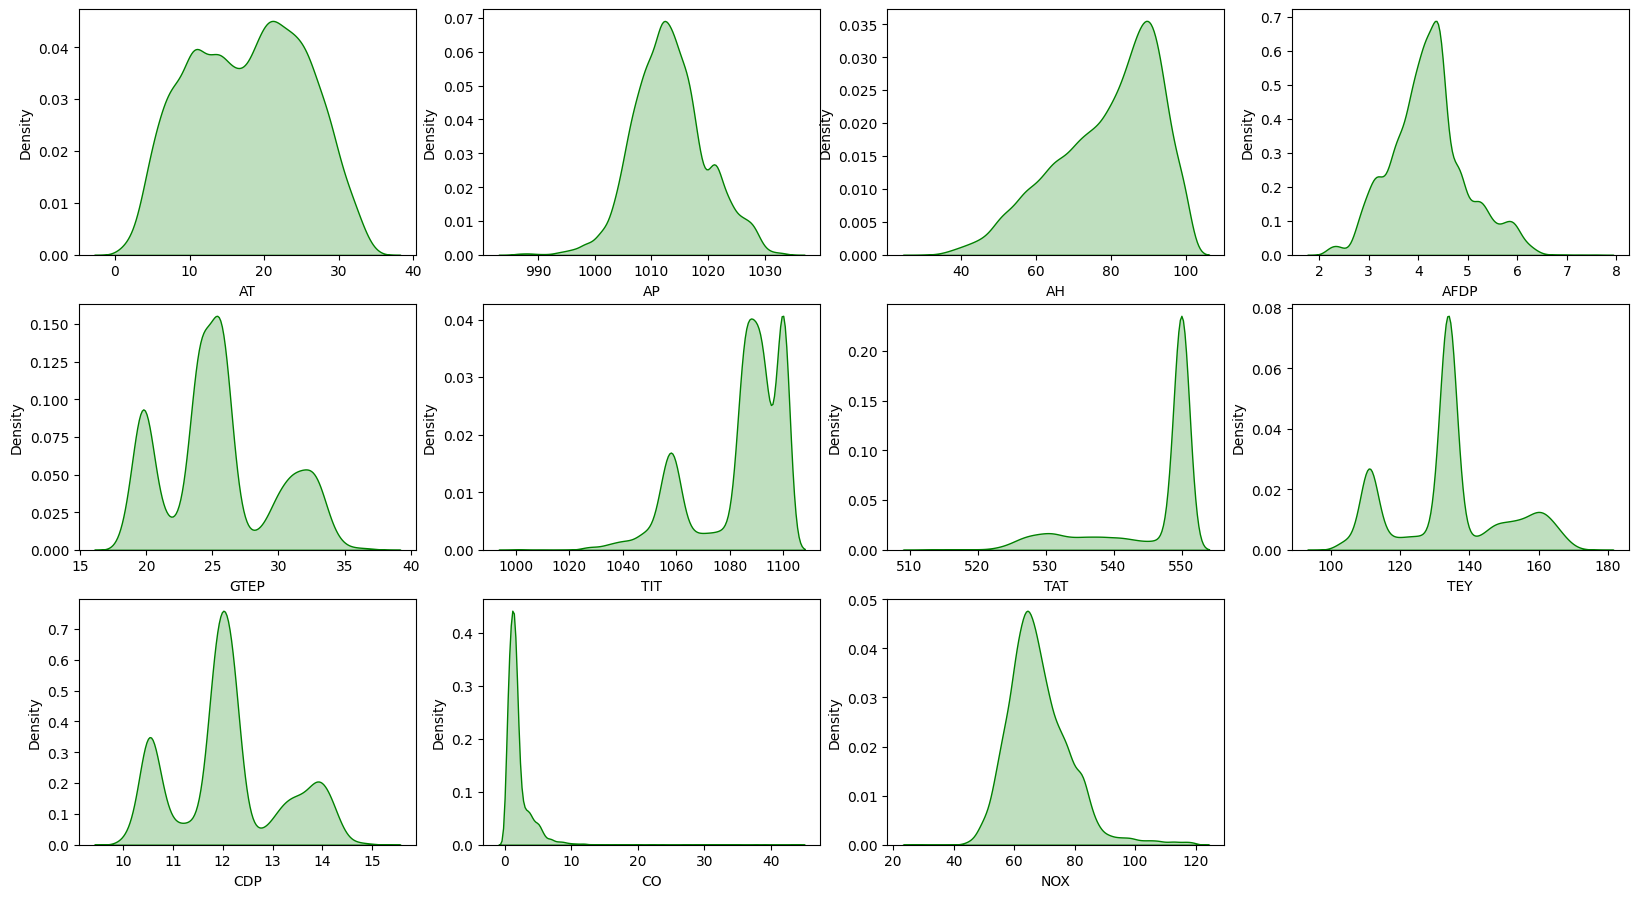

In [9]:
# KDE plot for numerical values

no_column = gt_data.columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_column,1):
    plt.subplot(8,4,i)
    sns.kdeplot(gt_data[column],color='g',shade=True)

In [10]:
X= df.iloc[:,0:12]
Y= df['TEY']

In [11]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [12]:
X=X.drop(["TEY"],axis=1)

In [13]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [14]:
Y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: TEY, Length: 15039, dtype: float64

In [15]:
n_features=X.shape[1]
n_features

10

In [16]:
def create_model(optimizer='adam'):
    model=Sequential()
    model.add(Dense(12,input_dim=n_features,kernel_initializer='uniform',
                   activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    
    #here we take loss func as means_squared_error coz its regression classifier
    model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])
    return model

# Early Stopping

In [17]:
import tensorflow as tf
import keras
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=20,
    verbose=3,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# Gridsearch with HyperParamater Tuning

In [ ]:
model=KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,20]
optimizer=['SGD', 'RMSprop', 'Adam']

## Make a dictionary of grid search Paramters
param_grid=dict(batch_size=batch_size,epochs=epochs,optimizer=optimizer)

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=3)


# Fitting parameters
fit_params = dict(callbacks=[early_stopping])

grid_result=grid.fit(X,Y,**fit_params)

<ipython-input-19-f44bd117114e>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasRegressor(build_fn=create_model,verbose=0)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END batch_size=10, epochs=10, optimizer=SGD;, score=-0.689 total time=  42.0s
[CV 2/5] END batch_size=10, epochs=10, optimizer=SGD;, score=-0.438 total time=  18.8s
[CV 3/5] END batch_size=10, epochs=10, optimizer=SGD;, score=-0.506 total time=  17.7s
[CV 4/5] END batch_size=10, epochs=10, optimizer=SGD;, score=-0.487 total time=  21.6s
[CV 5/5] END batch_size=10, epochs=10, optimizer=SGD;, score=-0.684 total time=  21.5s
[CV 1/5] END batch_size=10, epochs=10, optimizer=RMSprop;, score=-0.686 total time=  18.3s
[CV 2/5] END batch_size=10, epochs=10, optimizer=RMSprop;, score=-0.437 total time=  21.9s
[CV 3/5] END batch_size=10, epochs=10, optimizer=RMSprop;, score=-0.502 total time=  18.3s
[CV 4/5] END batch_size=10, epochs=10, optimizer=RMSprop;, score=-0.485 total time=  18.6s
[CV 5/5] END batch_size=10, epochs=10, optimizer=RMSprop;, score=-0.682 total time=  17.8s
[CV 1/5] END batch_size=10, epochs=10, optimizer=

In [20]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))


Best : -0.5583330988883972, using {'batch_size': 20, 'epochs': 20, 'optimizer': 'Adam'}
-0.5608423531055451,0.10504598276037315 with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'SGD'}
-0.5585502505302429,0.10479764317044682 with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'RMSprop'}
-0.558573979139328,0.10471002591881104 with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adam'}
-0.560074120759964,0.10505760581900345 with: {'batch_size': 10, 'epochs': 20, 'optimizer': 'SGD'}
-0.5585902035236359,0.10484273752215115 with: {'batch_size': 10, 'epochs': 20, 'optimizer': 'RMSprop'}
-0.5583646893501282,0.10473680629767194 with: {'batch_size': 10, 'epochs': 20, 'optimizer': 'Adam'}
-0.701374089717865,0.3196289244792633 with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'SGD'}
-0.5586579084396363,0.10474936555076832 with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'RMSprop'}
-0.5588156938552856,0.10482665498592103 with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'Adam'}
-0.5607850

In [21]:
grid_result.best_params_

{'batch_size': 20, 'epochs': 20, 'optimizer': 'Adam'}

# Final Model Building

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [24]:
X_train.shape

(10527, 10)

In [25]:
X_test.shape

(4512, 10)

In [26]:
model_new=keras.Sequential([
    keras.layers.Dense(4,input_dim=(n_features),activation='relu'),
    keras.layers.Dense(2,activation='relu')
])
model_new.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [27]:
seed_value=0
import random
import tensorflow
tensorflow.random.set_seed(seed_value)
model_new.fit(X_train,Y_train,epochs=20,batch_size=20,verbose=1)

Epoch 1/20
527/527 [==============================] - 2s 2ms/step - loss: 0.5987 - accuracy: 0.0000e+00
Epoch 2/20
527/527 [==============================] - 1s 2ms/step - loss: 0.4814 - accuracy: 0.0000e+00
Epoch 3/20
527/527 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.0000e+00
Epoch 4/20
527/527 [==============================] - 1s 2ms/step - loss: 0.4727 - accuracy: 0.0000e+00
Epoch 5/20
527/527 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.0000e+00
Epoch 6/20
527/527 [==============================] - 1s 2ms/step - loss: 0.4719 - accuracy: 0.0000e+00
Epoch 7/20
527/527 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.0000e+00
Epoch 8/20
527/527 [==============================] - 1s 2ms/step - loss: 0.4716 - accuracy: 0.0000e+00
Epoch 9/20
527/527 [==============================] - 1s 2ms/step - loss: 0.4715 - accuracy: 0.0000e+00
Epoch 10/20
527/527 [==============================] - 1s 2ms/st

In [28]:
model_new.evaluate(X_test,Y_test)

141/141 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.0000e+00


[0.49752894043922424, 0.0]